In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data2.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5046 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                   64
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

id                   0.000000
gender               0.000000
age                  1.252446
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [9]:
df['age'].value_counts()

age
78.00    101
57.00     95
52.00     89
54.00     86
79.00     85
        ... 
0.16       3
0.48       3
1.40       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

In [10]:
df1 = df.copy()
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
df1.dropna(inplace=True)

In [12]:
df1.shape

(4847, 12)

In [13]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
age_missing_index = df[df['age'].isnull()].index.to_list()
age_missing_index

[162,
 249,
 481,
 540,
 581,
 615,
 634,
 660,
 680,
 733,
 762,
 797,
 887,
 963,
 1038,
 1101,
 1403,
 1430,
 1465,
 1512,
 1555,
 1607,
 1679,
 1737,
 1793,
 1848,
 1890,
 1941,
 1991,
 2055,
 2093,
 2149,
 2253,
 2347,
 2397,
 2454,
 2481,
 2514,
 2555,
 2595,
 2617,
 2644,
 2683,
 2709,
 2749,
 2775,
 2815,
 2857,
 2898,
 2937,
 2992,
 3030,
 3060,
 3087,
 3112,
 3138,
 3168,
 3194,
 3223,
 3246,
 3275,
 3300,
 3326,
 3351]

In [15]:
bmi_missing_index = df[df['bmi'].isnull()].index.to_list()
bmi_missing_index

[1,
 8,
 13,
 19,
 27,
 29,
 43,
 46,
 50,
 51,
 54,
 57,
 64,
 70,
 78,
 81,
 84,
 105,
 112,
 124,
 126,
 129,
 133,
 146,
 150,
 160,
 161,
 162,
 167,
 170,
 171,
 174,
 178,
 183,
 189,
 198,
 200,
 218,
 227,
 247,
 342,
 360,
 432,
 477,
 479,
 522,
 668,
 671,
 680,
 729,
 742,
 865,
 867,
 872,
 879,
 903,
 936,
 965,
 1102,
 1106,
 1115,
 1183,
 1194,
 1214,
 1235,
 1241,
 1277,
 1293,
 1300,
 1306,
 1324,
 1342,
 1352,
 1427,
 1457,
 1466,
 1468,
 1471,
 1503,
 1528,
 1539,
 1546,
 1596,
 1640,
 1644,
 1646,
 1650,
 1669,
 1670,
 1681,
 1718,
 1719,
 1730,
 1753,
 1756,
 1779,
 1816,
 1836,
 1837,
 1866,
 1894,
 1906,
 1912,
 1981,
 1993,
 2030,
 2103,
 2105,
 2109,
 2192,
 2215,
 2263,
 2285,
 2321,
 2322,
 2339,
 2343,
 2477,
 2494,
 2502,
 2515,
 2529,
 2532,
 2541,
 2582,
 2697,
 2739,
 2752,
 2768,
 2788,
 2816,
 2828,
 2855,
 2867,
 2879,
 2897,
 2914,
 2960,
 2997,
 3007,
 3028,
 3048,
 3059,
 3074,
 3104,
 3111,
 3135,
 3161,
 3162,
 3164,
 3176,
 3197,
 3214,
 3215,

In [16]:
df2 = df.copy()
df2['age'].mean()
df2['age'].fillna('43', inplace=True)
df2.isnull().sum()

/tmp/ipykernel_5918/404340332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['age'].fillna('43', inplace=True)
/tmp/ipykernel_5918/404340332.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2['age'].fillna('43', inplace=True)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:

df2['bmi'].fillna(df2['bmi'].median(), inplace=True)
df2.isnull().sum()

/tmp/ipykernel_5918/2695122725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['bmi'].fillna(df2['bmi'].median(), inplace=True)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
df['bmi'].median()

28.1

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df3 = df.copy()
df3['age'] = imputer.fit_transform(df3[['age']])
df3.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='median')

df3['bmi'] = imputer.fit_transform(df3[['bmi']])
df3.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
df3.duplicated().sum()

0

# Outlier 
## Box plot


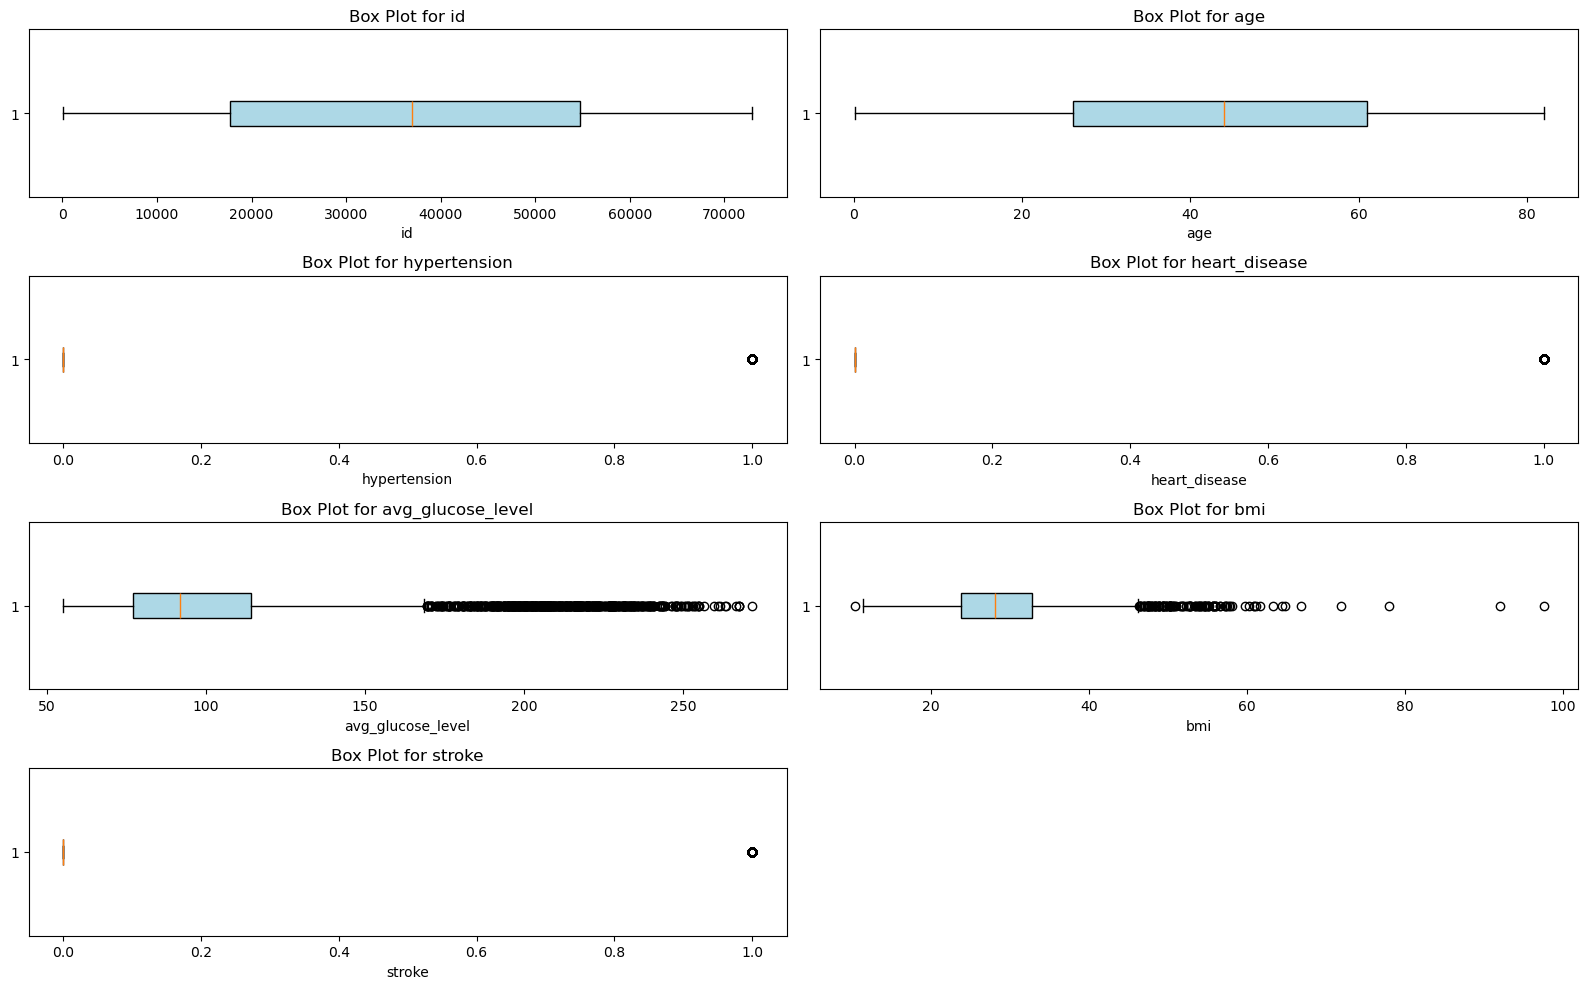

In [22]:
numerical_columns = df3.select_dtypes(include=['float64','int64']).columns

# Plot box plots for all numerical columns to check for outliers
plt. figure (figsize=(16, 10))
for i, column in enumerate (numerical_columns, 1):
    plt.subplot (len(numerical_columns) // 2 + 1, 2, i)
    plt.boxplot(df3[column], vert=False, patch_artist=True, boxprops=dict (facecolor="lightblue"))
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [23]:
Q1 = df3['avg_glucose_level'].quantile(0.25)
Q3 = df3['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier=df3[(df3['avg_glucose_level']<lower_bound) | (df3['avg_glucose_level']>upper_bound)]
print(len(outlier))

627


In [24]:
df3 = df3[(df3['avg_glucose_level'] >= lower_bound) & (df3['avg_glucose_level'] <= upper_bound)]
print(len(df3))

4483


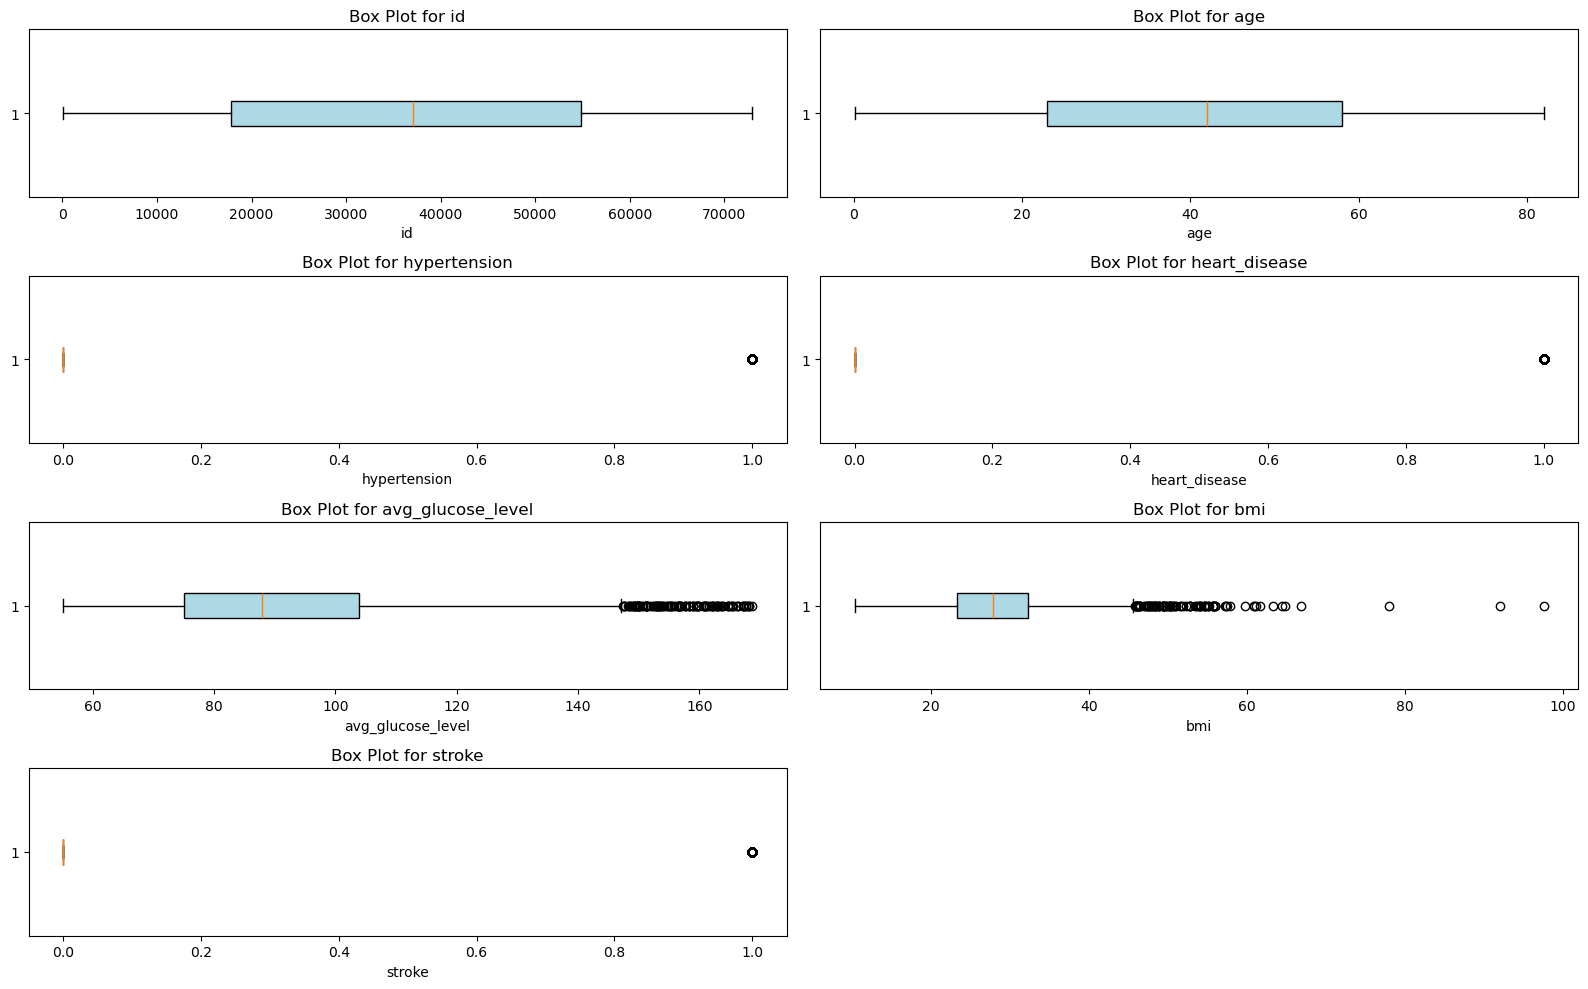

In [25]:
plt. figure (figsize=(16, 10))
for i, column in enumerate (numerical_columns, 1):
    plt.subplot (len(numerical_columns) // 2 + 1, 2, i)
    plt.boxplot(df3[column], vert=False, patch_artist=True, boxprops=dict (facecolor="lightblue"))
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Encoding

- Label encoding (val 1,2,3,4,5,6.....,n) used when fewer classes
- One hot encoding (0,1/binary) used when we have lesser classes

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Value count for categorical columns: ")
for column in categorical_columns :
    print('\n')
    print(df3[column].value_counts())

Value count for categorical columns: 


gender
Female    2665
Male      1817
Other        1
Name: count, dtype: int64


ever_married
Yes    2801
No     1682
Name: count, dtype: int64


work_type
Private          2553
children          675
Self-employed     669
Govt_job          564
Never_worked       22
Name: count, dtype: int64


Residence_type
Urban    2274
Rural    2209
Name: count, dtype: int64


smoking_status
never smoked       1633
Unknown            1441
formerly smoked     724
smokes              685
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df3['gender'] = le.fit_transform(df3['gender'])
df3['ever_married'] = le.fit_transform(df3['ever_married'])
df3['Residence_type'] = le.fit_transform(df3['Residence_type'])

df3


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
6,53882,1,74.0,1,1,1,Private,0,70.09,27.4,never smoked,1
7,10434,0,69.0,0,0,0,Private,1,94.39,22.8,never smoked,1
8,27419,0,59.0,0,0,1,Private,0,76.15,28.1,Unknown,1
9,60491,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [28]:
df3 = pd.get_dummies(df3, columns=['work_type','smoking_status'],drop_first=True)

df3

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
6,53882,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,False,True,False
7,10434,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,False,True,False
8,27419,0,59.0,0,0,1,0,76.15,28.1,1,False,True,False,False,False,False,False
9,60491,0,78.0,0,0,1,1,58.57,24.2,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.1,0,False,True,False,False,False,True,False
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,True,False
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,True,False
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True,False,False


In [29]:
boolean_columns=[
    'work_type_Never_worked',
    'work_type_Private',
    'work_type_Self-employed',
    'work_type_children',
    'smoking_status_formerly smoked',
    'smoking_status_never smoked',
    'smoking_status_smokes'
]

df3[boolean_columns] = df3[boolean_columns].astype(int)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4483 entries, 2 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4483 non-null   int64  
 1   gender                          4483 non-null   int64  
 2   age                             4483 non-null   float64
 3   hypertension                    4483 non-null   int64  
 4   heart_disease                   4483 non-null   int64  
 5   ever_married                    4483 non-null   int64  
 6   Residence_type                  4483 non-null   int64  
 7   avg_glucose_level               4483 non-null   float64
 8   bmi                             4483 non-null   float64
 9   stroke                          4483 non-null   int64  
 10  work_type_Never_worked          4483 non-null   int64  
 11  work_type_Private               4483 non-null   int64  
 12  work_type_Self-employed         4483 no

## Scaling
    - Keeps value into a ranges

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3),columns=df3.columns)

# Feature Engineering 
- Normalization 

In [36]:
x = df3.drop('stroke',axis=1)
y = df3['stroke']

In [37]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [38]:
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(x,y)

SelectKBest()

In [39]:
fs = pd.DataFrame(fit_features.scores_,index=x.columns, columns = ['score values'])
fs

,score values
id,0.003088
gender,0.000066
age,247.933082
hypertension,55.729481
heart_disease,36.593028
ever_married,38.886861
Residence_type,0.466135
avg_glucose_level,0.045646
bmi,0.756240
work_type_Never_worked,0.844595


In [40]:
fs.nlargest(10,'score values')  #serially prothom 10 ta value dibe

,score values
age,247.933082
hypertension,55.729481
ever_married,38.886861
heart_disease,36.593028
work_type_Self-employed,29.632021
work_type_children,25.809414
smoking_status_formerly smoked,19.321737
work_type_Never_worked,0.844595
bmi,0.756240
Residence_type,0.466135


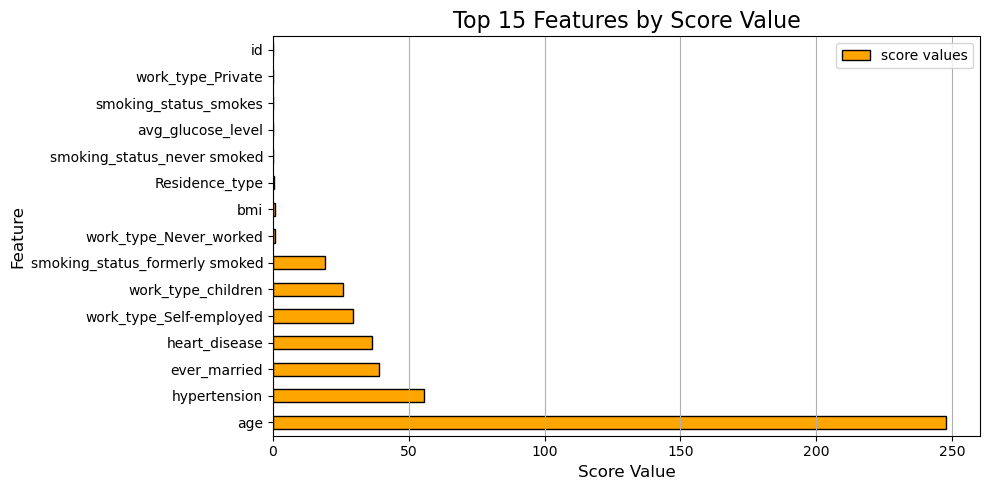

In [41]:
fs.nlargest(15, 'score values').plot(kind="barh", figsize=(10, 5), color='orange', edgecolor='black')
plt.title('Top 15 Features by Score Value', fontsize=16)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [43]:
x = df3[fs[fs['score values'] > 2.5].index]
x

,age,hypertension,heart_disease,ever_married,work_type_Self-employed,work_type_children,smoking_status_formerly smoked
0,0.975586,0.0,1.0,1.0,0.0,0.0,0.0
1,0.902344,1.0,1.0,1.0,0.0,0.0,0.0
2,0.841309,0.0,0.0,0.0,0.0,0.0,0.0
3,0.719238,0.0,0.0,1.0,0.0,0.0,0.0
4,0.951172,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4478,0.975586,1.0,0.0,1.0,0.0,0.0,0.0
4479,0.987793,0.0,0.0,1.0,1.0,0.0,0.0
4480,0.426270,0.0,0.0,1.0,1.0,0.0,0.0
4481,0.621582,0.0,0.0,1.0,0.0,0.0,1.0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)